<center>
    
# Docker与自制课程镜像

</center>




<div class="alert alert-block alert-success">  
 <b>Author:</b> Ebby <b>Date:</b> 2020-07-07 
    
分享对容器和自定义课程镜像的认识 ...
</div>

## Docker 是什么？

<div class="alert alert-block alert-danger">  
<b>📌</b>
    
以下内容来自官方：
>Docker 是世界领先的软件容器平台。
> 开发人员利用 Docker 可以消除协作编码时“在我的机器上可正常工作”的问题。
> 运维人员利用 Docker 可以在隔离容器中并行运行和管理应用，获得更好的计算密度。
> 企业利用 Docker 可以构建敏捷的软件交付管道，以更快的速度、更高的安全性和可靠的信誉为 Linux 和 Windows Server 应用发布新功能。
</div>


## Docker ≠ Container



<div class="alert alert-block alert-danger">  
<b>📌</b>
    
docker并不是LXC替代品，docker底层使用了LXC来实现，LXC将linux进程沙盒化，使得进程之间相互隔离，并且能够控制各进程的资源分配。在LXC的基础之上，docker提供了一系列更强大的功能。

> Linux 容器不是模拟一个完整的操作系统，而是对进程进行隔离。或者说，在正常进程的外面套了一个保护层。对于容器里面的进程来说，它接触到的各种资源都是虚拟的，从而实现与底层系统的隔离。
</div>

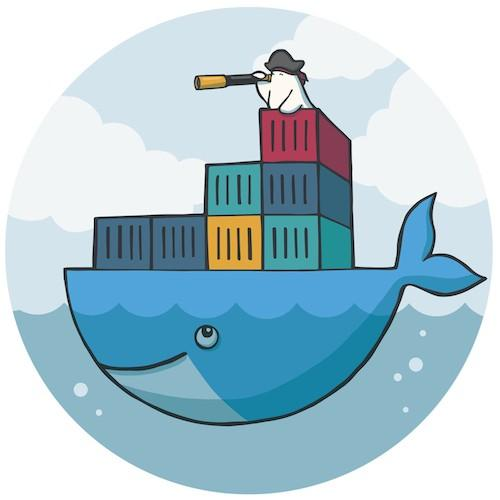



<div class="alert alert-block alert-danger">  
<b>📌</b>
    
Docker的思想来自于集装箱，集装箱解决了什么问题？在一艘大船上，把货物规整的摆放起来。并且各种各样的货物被集装箱标准化了，集装箱和集装箱之间不会互相影响。docker就是类似的理念。现在都流行云计算了，云计算就好比大货轮。docker就是集装箱。
</div>



## 容器与虚拟机

<center>
    
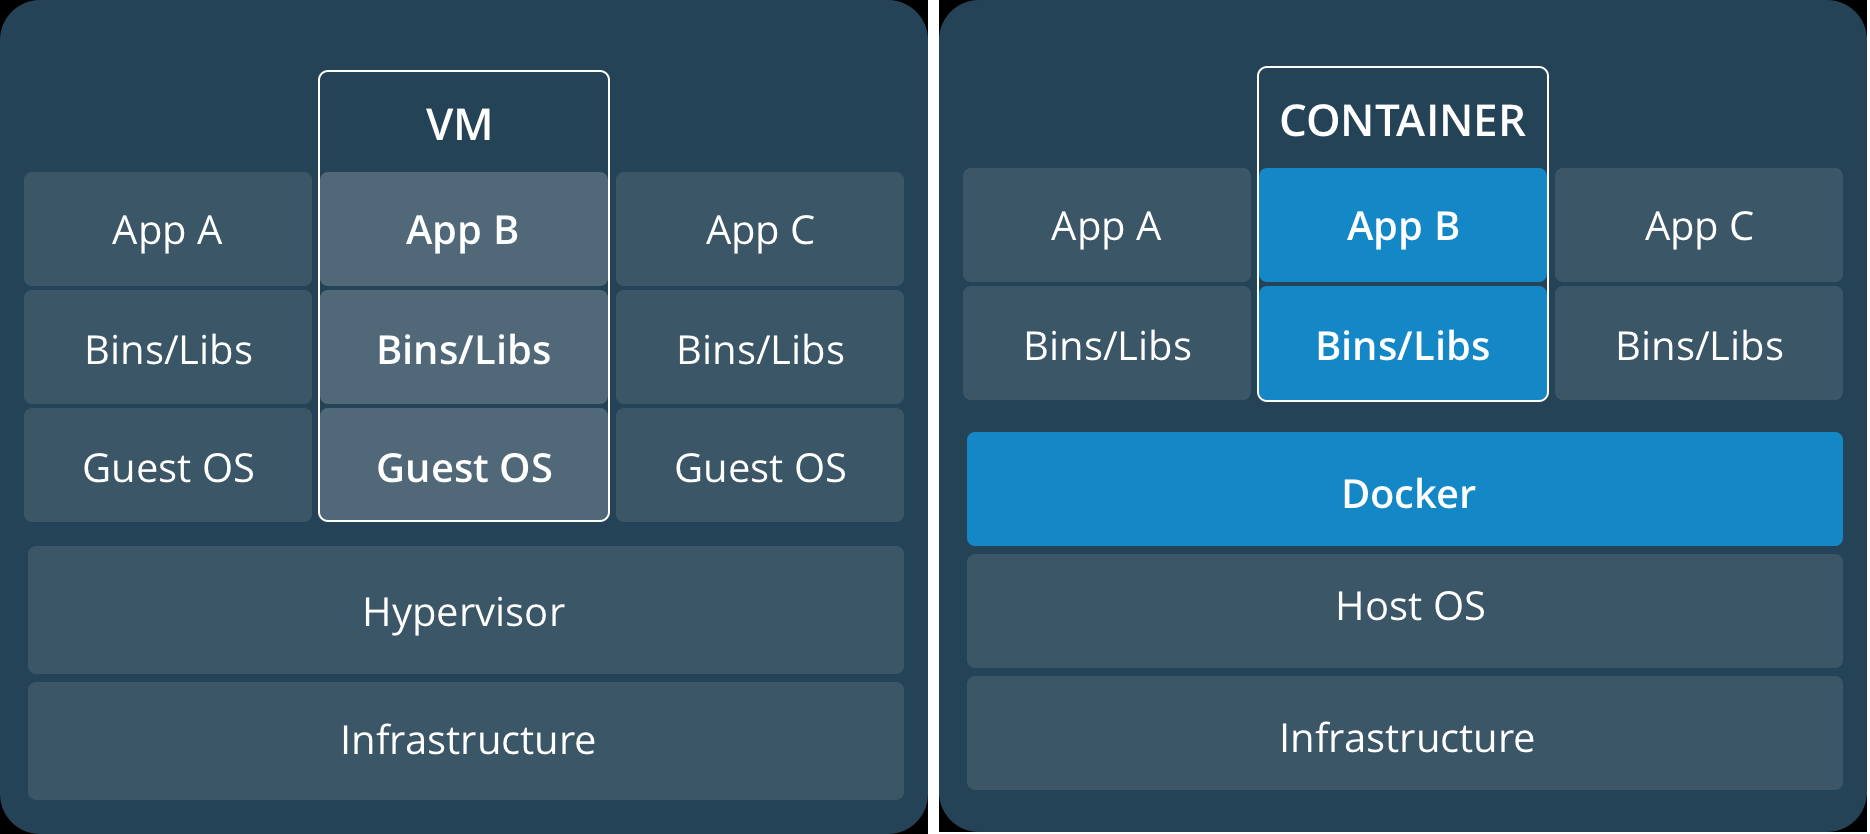


</center>

<div class="alert alert-block alert-danger">  
<b>📌</b>
    
- 容器时在linux上本机运行，并与其他容器共享主机的内核，它运行的一个独立的进程，不占用其他任何可执行文件的内存，非常轻量。

- 虚拟机运行的是一个完成的操作系统，通过虚拟机管理程序对主机资源进行虚拟访问，相比之下需要的资源更多。

| **特性**   | **容器**           | **虚拟机**   |
| ---------- | ------------------ | ------------ |
| 启动       | 秒级               | 分钟级       |
| 硬盘使用   | 一般为MB           | 一般为GB     |
| 性能       | 接近原生           | 弱于         |
| 系统支持量 | 单机支持上千个容器 | 一般是几十个 |
    
</div>

## 镜像 + 容器 + 仓库

### 镜像

<div class="alert alert-block alert-danger">  
<b>📌</b>
    
> 镜像是 Docker 运行容器的前提，仓库是存放镜像的场所
</div>


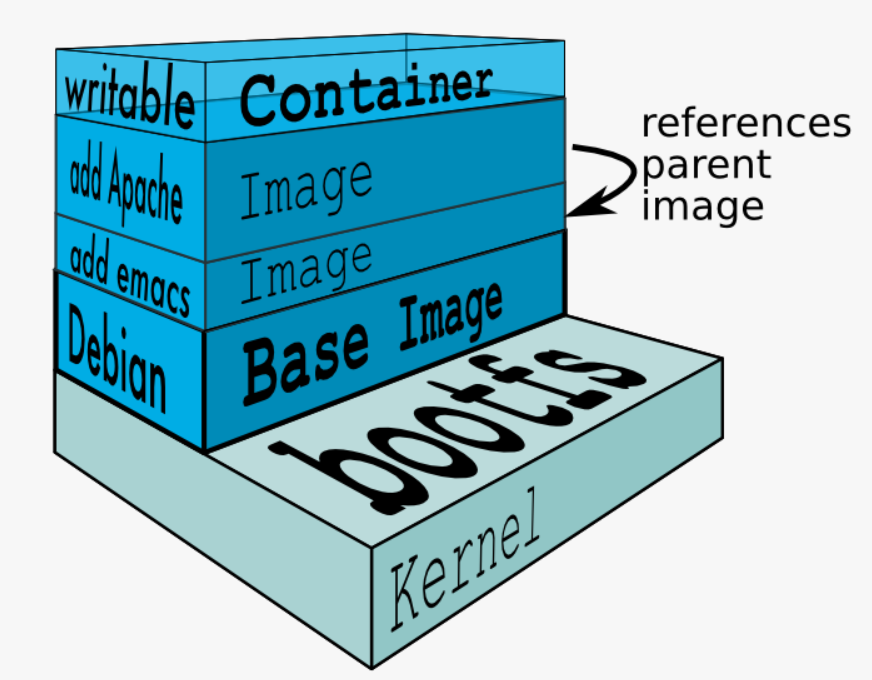

每一个镜像都可能依赖于由一个或多个下层的组成的另一个镜像。我们有时说，下层那个 镜像是上层镜像的父镜像。(所以说镜像有点像类)

一个没有任何父镜像的镜像，谓之基础镜像。
> 注意一个镜像不能超过 127 层
> 基于overlay2文件系统实现


- 文件系统
- 只读/无状态

### 容器（Container）
<div class="alert alert-block alert-danger">  
<b>📌</b>
    
容器 (container) 的定义和镜像 (image) 几乎一模一样，也是一堆层的统一视角，唯一区别在于容器的最上面那一层是可读可写的。

- 容器 = 镜像 + 读写层
</div>


### 仓库

<div class="alert alert-block alert-danger">  
<b>📌</b>
    
Docker 仓库是集中存放镜像文件的场所。镜像构建完成后，可以很容易的在当前宿主上运行，但是， 如果需要在其它服务器上使用这个镜像，我们就需要一个集中的存储、分发镜像的服务，Docker Registry (仓库注册服务器)就是这样的服务。有时候会把仓库 (Repository) 和仓库注册服务器 (Registry) 混为一谈，并不严格区分。Docker 仓库的概念跟 Git 类似，注册服务器可以理解为 GitHub 这样的托管服务。
</div>



![](imgs/cs_docker.png)

Docker 使用 C/S 结构，即客户端/服务器体系结构。 Docker 客户端与 Docker 服务器进行交互，Docker服务端负责构建、运行和分发 Docker 镜像。 Docker 客户端和服务端可以运行在一台机器上，也可以通过 RESTful 、 stock 或网络接口与远程 Docker 服务端进行通信。

# 为什么机器学习需要Docker

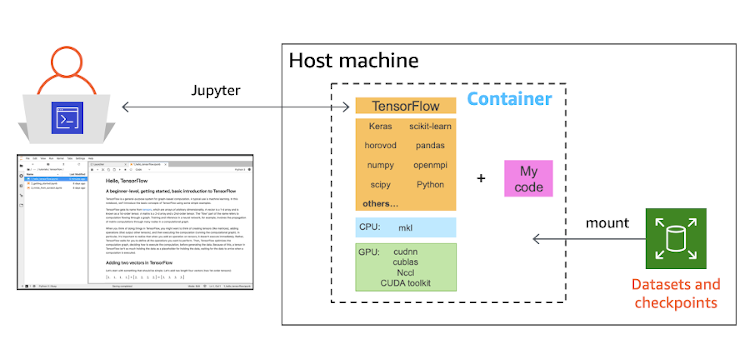

## 机器学习开发环境的基本需求

<div class="alert alert-block alert-danger">  
<b>📌</b>
    
- 计算：训练模型离不开高性能 CPU 和 GPU。

- 存储：用于存储大型训练数据集和您在训练过程中生成的元数据。

- 框架和库：提供用于训练的 API 和执行环境。

- 源代码控制：用于协作、备份和自动化。
</div>

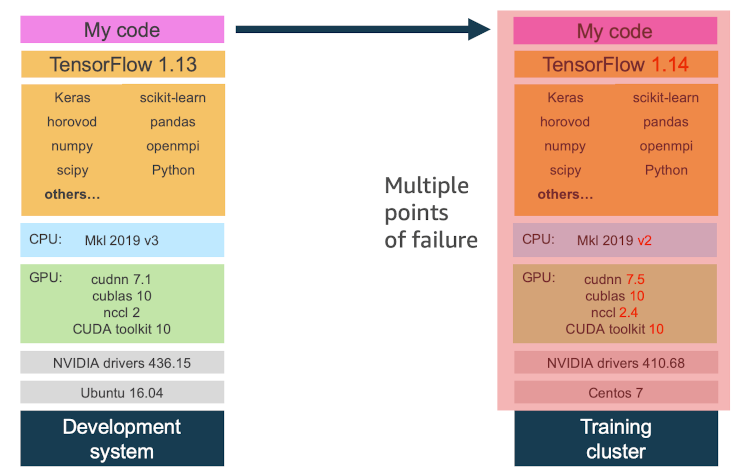

In [ ]:
# 6 hours of installing dependencies
python train.py
# > ERROR: libobscure.so cannot open shared object

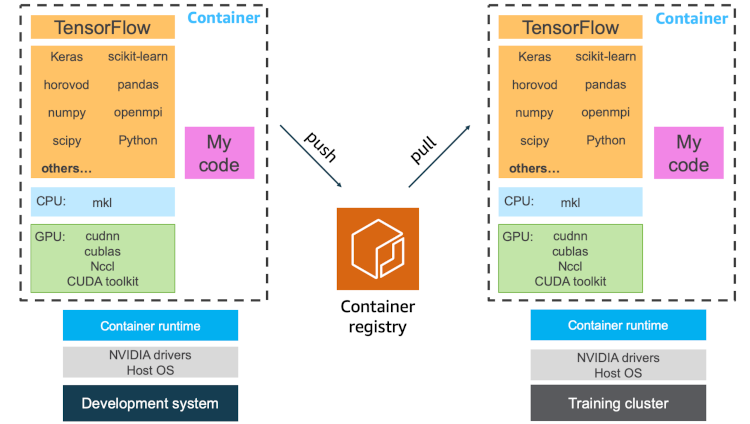

In [ ]:
docker run tensorflow/tensorflow:0.12.1-gpu python train.py
# 1 minitues later ...

>>> START TRAINING

# 实战

In [20]:
!docker version

Client:
 Version:           18.09.2
 API version:       1.39
 Go version:        go1.10.6
 Git commit:        6247962
 Built:             Sun Feb 10 04:13:50 2019
 OS/Arch:           linux/amd64
 Experimental:      false

Server: Docker Engine - Community
 Engine:
  Version:          18.09.2
  API version:      1.39 (minimum version 1.12)
  Go version:       go1.10.6
  Git commit:       6247962
  Built:            Sun Feb 10 03:42:13 2019
  OS/Arch:          linux/amd64
  Experimental:     false


In [49]:
!docker info |grep Driver

Storage Driver: overlay2
Logging Driver: json-file
Cgroup Driver: cgroupfs


In [23]:
!docker ps -a

CONTAINER ID        IMAGE                      COMMAND                  CREATED             STATUS                     PORTS               NAMES
18519cbe344c        2ec4425efe02               "/bin/sh -c 'pip ins…"   7 days ago          Exited (1) 7 days ago                          dazzling_perlman
ef37eb6af6cd        caapi/ai                   "/bin/entry"             7 days ago          Exited (130) 7 days ago                        elated_matsumoto
77e1b5f3bfc9        ddebby/fastai2:v0.0.17.1   "/usr/bin/tini -- /b…"   2 weeks ago         Exited (130) 2 weeks ago                       youthful_varahamihira
4d67d6b7cde4        fastai2                    "/usr/bin/tini -- /b…"   2 weeks ago         Exited (0) 2 weeks ago                         upbeat_chaum
4a98f87188f5        7215e5615947               "/usr/bin/tini -- /b…"   4 weeks ago         Exited (0) 4 weeks ago                         relaxed_tereshkova
8db764a7eccb        5c255a4248f5               "/bin/sh -c 'conda u…"   

In [ ]:
!docker inspect 18519cbe344c

In [ ]:
!docker images

### 寻找合适的镜像

In [28]:
! docker search tensorflow

NAME                                       DESCRIPTION                                     STARS               OFFICIAL            AUTOMATED
tensorflow/tensorflow                      Official Docker images for the machine learn…   1713                                    
jupyter/tensorflow-notebook                Jupyter Notebook Scientific Python Stack w/ …   222                                     
tensorflow/serving                         Official images for TensorFlow Serving (http…   92                                      
xblaster/tensorflow-jupyter                Dockerized Jupyter with tensorflow              54                                      [OK]
rocm/tensorflow                            Tensorflow with ROCm backend support            48                                      
floydhub/tensorflow                        tensorflow                                      24                                      [OK]
bitnami/tensorflow-serving                 Bitnami Docker I

In [12]:
! docker search openpai

NAME                                     DESCRIPTION                              STARS               OFFICIAL            AUTOMATED
openpai/hadoop-run                                                                1                                       
openpai/alpine                                                                    0                                       
openpai/rest-server                                                               0                                       
openpai/pai.example.tensorflow           Tensorflow example image for OpenPAI     0                                       
openpai/yarn-exporter                                                             0                                       
openpai/zookeeper                                                                 0                                       
openpai/yarn-frameworklauncher                                                    0                                       
openpai

In [18]:
!docker images

REPOSITORY                           TAG                               IMAGE ID            CREATED             SIZE
ddebby/cdr                           v0.1                              56cfeb2d4c45        2 days ago          3.16GB
ds-docker02                          latest                            56cfeb2d4c45        2 days ago          3.16GB
<none>                               <none>                            42a1de3e3b52        2 days ago          3.16GB
<none>                               <none>                            6a8b5394e57a        2 days ago          3.09GB
ddebby/0.python-tutorials            latest                            e4d86ae7834d        3 days ago          706MB
ddebby/mini-ailab                    latest                            441ce3f9e2b0        3 days ago          1.71GB
ddebby/mini-ailab                    v0.2                              441ce3f9e2b0        3 days ago          1.71GB
test001                              latest                

In [19]:
!docker run hello-world


Hello from Docker!
This message shows that your installation appears to be working correctly.

To generate this message, Docker took the following steps:
 1. The Docker client contacted the Docker daemon.
 2. The Docker daemon pulled the "hello-world" image from the Docker Hub.
    (amd64)
 3. The Docker daemon created a new container from that image which runs the
    executable that produces the output you are currently reading.
 4. The Docker daemon streamed that output to the Docker client, which sent it
    to your terminal.

To try something more ambitious, you can run an Ubuntu container with:
 $ docker run -it ubuntu bash

Share images, automate workflows, and more with a free Docker ID:
 https://hub.docker.com/

For more examples and ideas, visit:
 https://docs.docker.com/get-started/



In [26]:
!docker ps -a |grep hello

f5107a7db88a        hello-world                                        "/hello"                 12 months ago       Exited (0) 12 months ago                                                                                            eloquent_goldwasser
32f2901f38ad        hello-world                                        "/hello"                 13 months ago       Exited (0) 13 months ago                                                                                            gifted_williams
50b2c8134814        hello-world                                        "/hello"                 13 months ago       Exited (0) 13 months ago                                                                                            priceless_shirley
fc3fb8dccd72        hello-world                                        "/hello"                 13 months ago       Exited (0) 13 months ago                                                                                            confident_payne
f5

In [25]:
! docker rm b1c2ad9a7bfe                

b1c2ad9a7bfe


## 构建课程镜像

In [1]:
!ls 8.Env-Build/

code  data  docker-entrypoint.sh  Dockerfile  environment.yml  README.md


### Docker file

Dockerfile 是自动构建 docker 镜像的配置文件， 用户可以使用 Dockerfile 快速创建自定义的镜像。

![](imgs/dockerfile.png)

```shell
# the base miniconda3 image
FROM ddebby/ai:v0.1.0

# load in the environment.yml file - this file controls what Python packages we install
ADD environment.yml /

# install the Python packages we specified into the base environment
RUN conda update -n base conda -y && conda env update

RUN conda install -c fastai -c pytorch fastai

# install tensorflow packages we specified into the base environment
RUN pip install fastai2 nbdev>=0.2.12 azure-cognitiveservices-search-imagesearch sentencepiece graphviz

# download the coder binary, untar it, and allow it to be executed
Add ./fastbook /fastbook

ENTRYPOINT ["docker-entrypoint.sh"]
````

### environment.yml 

```bash
name: base
channels:
  - fastai
  - pytorch
  - defaults
dependencies:
  - jupyter
  - pytorch>=1.3.0
  - torchvision>=0.5
  - matplotlib
  - pandas
  - requests
  - pyyaml
  - fastprogress>=0.1.22
  - pillow
  - python>=3.6
  - pip
  - scikit-learn
  - scipy
  - spacy
  - graphviz
  - ipywidgets
```

### docker-entrypoint.sh

```bash
#!/bin/bash
set -e

if [ $# -eq 0 ]
  then
    jupyter lab --ip=0.0.0.0 --NotebookApp.token='CXY2019!!!!' --allow-root --no-browser --notebook-dir=/code &> /dev/null &
    code-server-3.1.1-linux-x86_64/code-server --allow-http --password 'CXY2019!!!!' --data-dir /data /code
  else
    exec "$@"
fi
```

### 制作镜像的步骤

1. docker build -t  image-name:tag
2. docker login
3. docker tag
4. docker push

## 举个例子🐴

In [4]:
!docker run --name ai001 -d -p 9999:9999 -v /home/inesa/data/backup20190526/training_notebook:/opt/notebook caapi/ai

9b21b44bf5ec94ef3247f8bafb65d58ba452c4a7f6bb42d9f8ea9dac9fa13af0


In [5]:
!docker ps

CONTAINER ID        IMAGE               COMMAND             CREATED             STATUS              PORTS                                                NAMES
9b21b44bf5ec        caapi/ai            "/bin/entry"        4 seconds ago       Up 3 seconds        80/tcp, 5000/tcp, 8888/tcp, 0.0.0.0:9999->9999/tcp   ai001


In [ ]:
#!docker exec -it ai001 /bin/sh

In [9]:
!docker images |grep caapi

caapi/cdr                            latest              440e6d93b9b0        12 months ago       285MB
caapi/ai                             latest              48d5e6ad3d43        13 months ago       232MB
caapi/ai                             <none>              5c958b5b5934        13 months ago       213MB
caapi/ai                             <none>              88535c643dc9        13 months ago       210MB


In [13]:
!ls /home/inesa/data/notebooks/dockerImages

custom	Dockerfile  requirements.txt


In [ ]:
#!docker build -t caapi/ai:v1.0.0 .

In [14]:
!docker images |grep caapi

caapi/ai                             v0.0.2              6fffd33723e1        2 minutes ago       238MB
caapi/cdr                            latest              440e6d93b9b0        12 months ago       285MB
caapi/ai                             latest              48d5e6ad3d43        13 months ago       232MB
caapi/ai                             <none>              5c958b5b5934        13 months ago       213MB
caapi/ai                             <none>              88535c643dc9        13 months ago       210MB


In [15]:
!docker run --name ai002 -d -p 9998:9999 -v /home/inesa/data/backup20190526/training_notebook:/opt/notebook caapi/ai:v0.0.2

0c7379cdd3d81f72d1223f3f7bd1f1717e0019c3555871aaf1bdea8b0735158f


In [ ]:
!docker login

In [ ]:
!docker tag caapi/ai:v0.0.2 ddebby/test_demo:v0.1

In [ ]:
!docker push ddebby/test_demo:v0.1

## 其它
- 关于容器对显卡的支持
    > 安装`nvidia-docker`
    
```bash
# Add the package repositories
$ distribution=$(. /etc/os-release;echo $ID$VERSION_ID)
$ curl -s -L https://nvidia.github.io/nvidia-docker/gpgkey | sudo apt-key add -
$ curl -s -L https://nvidia.github.io/nvidia-docker/$distribution/nvidia-docker.list | sudo tee /etc/apt/sources.list.d/nvidia-docker.list
$ sudo apt-get update && sudo apt-get install -y nvidia-container-toolkit
$ sudo systemctl restart docker
```

<center>
    
# 谢谢    
</center>

### 镜像推荐


- 一个镜像解决所有环境的依赖： `Deepo`,[Github](https://github.com/ufoym/deepo)
```bash
docker pull ufoym/deepo:cpu
```

```
Deepo is a series of Docker images that
allows you to quickly set up your deep learning research environment  supports almost all commonly used deep learning frameworks  supports GPU acceleration (CUDA and cuDNN included), also works in CPU-only mode  works on Linux (CPU version/GPU version), Windows (CPU version) and OS X (CPU version)  and their Dockerfile generator that
allows you to customize your own environment with Lego-like modules  automatically resolves the dependencies for you
```